<a href="https://colab.research.google.com/github/StevenHolmberg/CSE5683/blob/main/Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3_2.mp4  3_4.mp4  6_1.mp4  6_3.mp4  6_4.mp4  6_5.mp4  calibration.json	dump
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
3_2.mp4  3_4.mp4  6_1.mp4  6_3.mp4  6_4.mp4  6_5.mp4  calibration.json	dump
/content/drive/MyDrive/AdvancedComputerVision/Assignment4_images
3_2.mp4  3_4.mp4  6_1.mp4  6_3.mp4  6_4.mp4  6_5.mp4  calibration.json	dump


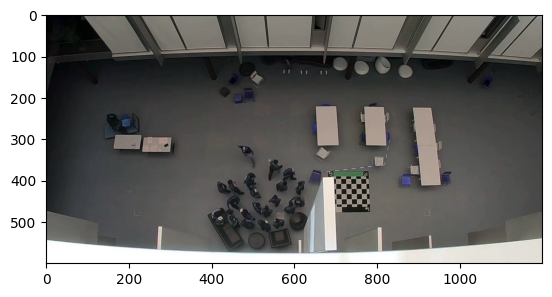

In [157]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import json

!ls
from google.colab import drive
drive.mount('/content/drive/')

video_path = '/content/drive/MyDrive/AdvancedComputerVision/Assignment4_images/6_1.mp4'
vidcap = cv2.VideoCapture(video_path)

if not vidcap.isOpened():
    raise ValueError(f"Could not open video file: {video_path}")

!ls
%cd /content/drive/MyDrive/AdvancedComputerVision/Assignment4_images/
!ls

# Parses the json file
def json_read(filename):
    try:
        with open(os.path.abspath(filename)) as f:
            data = json.load(f)
        return data
    except:
        raise ValueError("Unable to read JSON {}".format(filename))

# Read json file containing the calibration data
calibration = json_read("calibration.json")

# Show the first frame from one of the videos
view = '6_1'
vidcap = cv2.VideoCapture("{}.mp4".format(view))
success,img = vidcap.read()

if not os.path.exists('6_1.mp4'):
    raise FileNotFoundError(f"File does not exist: {'6_1.mp4'}")
if not vidcap.isOpened():
    raise ValueError(f"Could not open video file: {view}.mp4")
if not success:
    raise ValueError(f"Could not read the first frame from {view}.mp4")

# Get the calibration matrices
Lambda = np.array(calibration[view]['K'])      # Intrinsic params.
Omega  = np.array(calibration[view]['R'])      # Rotation
tau    = np.array(calibration[view]['t'])      # Translation
dist   = np.array(calibration[view]['dist'])   # Lens distortion

tau = tau.reshape(-1, 1)  # Reshape into a column vector
extrinsic = np.vstack(( np.hstack((Omega, tau)) , [0, 0, 0, 1]))

intrinsic = np.hstack((Lambda, np.zeros((3, 1))))

plt.figure()
plt.imshow(img)
# img = cv2.undistort(img, Lambda, dist)


In [158]:
# Check if video '6_4.mp4' is loaded
view = '6_4'
vidcap = cv2.VideoCapture("{}.mp4".format(view))

if vidcap.isOpened():
    print("Video '6_4.mp4' loaded successfully.")
else:
    print("Failed to load video '6_4.mp4'.")


Video '6_4.mp4' loaded successfully.


In [159]:
# # Parses the json file
# def json_read(filename):
#     try:
#         with open(os.path.abspath(filename)) as f:
#             data = json.load(f)
#         return data
#     except:
#         raise ValueError("Unable to read JSON {}".format(filename))

# # Read json file containing the calibration data
# calibration = json_read("calibration.json")

# # Show the first frame from one of the videos
# view = '3_2'
# vidcap = cv2.VideoCapture("{}.mp4".format(view))
# success,img1 = vidcap.read()

# # Get the calibration matrices
# Lambda_1 = np.array(calibration[view]['K'])      # Intrinsic params.
# Omega_1  = np.array(calibration[view]['R'])      # Rotation
# tau_1    = np.array(calibration[view]['t'])      # Translation
# dist_1   = np.array(calibration[view]['dist'])   # Lens distortion

# tau_1 = tau_1.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega_1, tau_1)) , [0, 0, 0, 1]))

# intrinsic = np.hstack((Lambda_1, np.zeros((3, 1))))

# # Show the first frame from one of the videos
# view = '3_4'
# vidcap = cv2.VideoCapture("{}.mp4".format(view))
# success,img2 = vidcap.read()

# # Get the calibration matrices
# Lambda_2 = np.array(calibration[view]['K'])      # Intrinsic params.
# Omega_2  = np.array(calibration[view]['R'])      # Rotation
# tau_2    = np.array(calibration[view]['t'])      # Translation
# dist_2   = np.array(calibration[view]['dist'])   # Lens distortion

# tau_2 = tau_2.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega_2, tau_2)) , [0, 0, 0, 1]))

# intrinsic = np.hstack((Lambda_2, np.zeros((3, 1))))

# # Show the first frame from one of the videos
# view = '6_1'
# vidcap = cv2.VideoCapture("{}.mp4".format(view))
# success,img3 = vidcap.read()

# # Get the calibration matrices
# Lambda_3 = np.array(calibration[view]['K'])      # Intrinsic params.
# Omega_3  = np.array(calibration[view]['R'])      # Rotation
# tau_3    = np.array(calibration[view]['t'])      # Translation
# dist_3   = np.array(calibration[view]['dist'])   # Lens distortion

# tau_3 = tau_3.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega_3, tau_3)) , [0, 0, 0, 1]))

# intrinsic = np.hstack((Lambda_3, np.zeros((3, 1))))

# # Show the first frame from one of the videos
# view = '6_3'
# vidcap = cv2.VideoCapture("{}.mp4".format(view))
# success,img4 = vidcap.read()
# view = '6_3'

# # Get the calibration matrices
# Lambda_4 = np.array(calibration[view]['K'])      # Intrinsic params.
# Omega_4  = np.array(calibration[view]['R'])      # Rotation
# tau_4    = np.array(calibration[view]['t'])      # Translation
# dist_4   = np.array(calibration[view]['dist'])   # Lens distortion

# tau_4 = tau_4.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega_4, tau_4)) , [0, 0, 0, 1]))

# intrinsic = np.hstack((Lambda_4, np.zeros((3, 1))))

# # Show the first frame from one of the videos
# view = '6_4'
# vidcap = cv2.VideoCapture("{}.mp4".format(view))
# success,img5 = vidcap.read()
# view = '6_4'

# # Get the calibration matrices
# Lambda_5 = np.array(calibration[view]['K'])      # Intrinsic params.
# Omega_5  = np.array(calibration[view]['R'])      # Rotation
# tau_5    = np.array(calibration[view]['t'])      # Translation
# dist_5   = np.array(calibration[view]['dist'])   # Lens distortion

# tau_5 = tau_5.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega_5, tau_5)) , [0, 0, 0, 1]))

# intrinsic = np.hstack((Lambda_5, np.zeros((3, 1))))

# # Show the first frame from one of the videos
# view = '6_5'
# vidcap = cv2.VideoCapture("{}.mp4".format(view))
# success,img6 = vidcap.read()
# view = '6_5'
# # Get the calibration matrices
# Lambda_6 = np.array(calibration[view]['K'])      # Intrinsic params.
# Omega_6  = np.array(calibration[view]['R'])      # Rotation
# tau_6    = np.array(calibration[view]['t'])      # Translation
# dist_6   = np.array(calibration[view]['dist'])   # Lens distortion

# tau_6 = tau_6.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega_6, tau_6)) , [0, 0, 0, 1]))

# intrinsic = np.hstack((Lambda_6, np.zeros((3, 1))))

# # Display all the frames
# plt.figure()
# plt.imshow(img1)
# plt.figure()
# plt.imshow(img2)
# plt.figure()
# plt.imshow(img3)
# plt.figure()
# plt.imshow(img4)
# plt.figure()
# plt.imshow(img5)
# plt.figure()
# plt.imshow(img6)

# # Store original images for mask generation
# img1_original = img1.copy()
# img2_original = img2.copy()
# img3_original = img3.copy()
# img4_original = img4.copy()
# img5_original = img5.copy()
# img6_original = img6.copy()



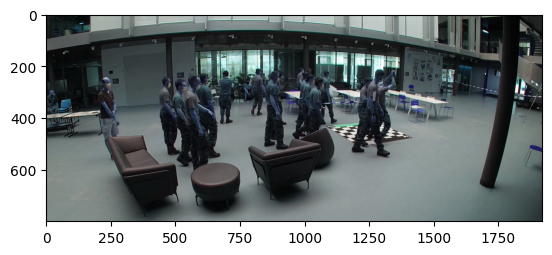

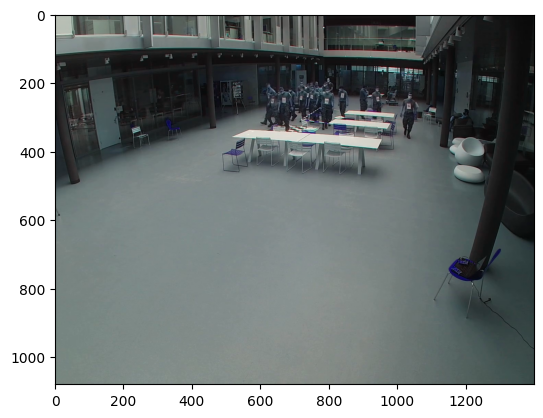

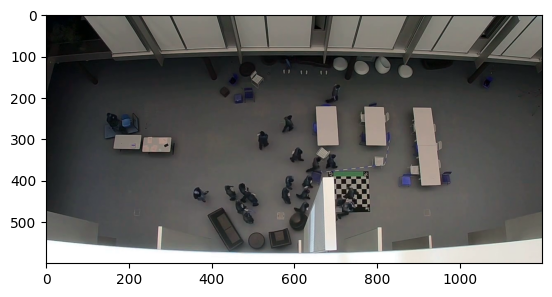

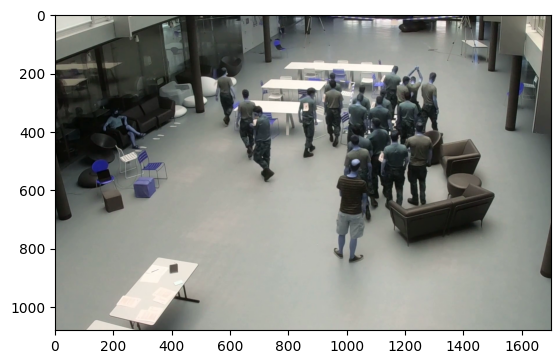

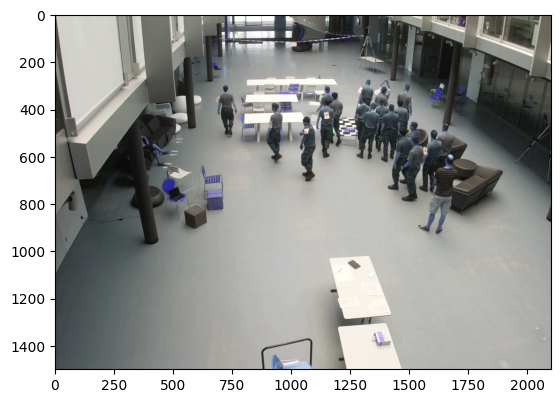

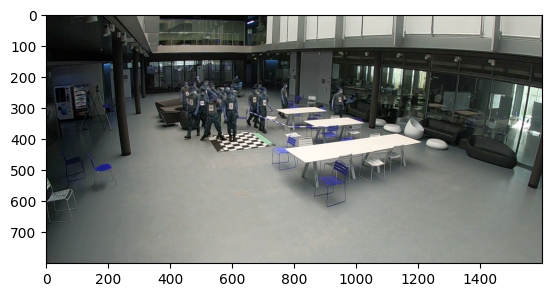

In [197]:
# Function to get a specific frame from the video
def get_frame(view, frame_number):
    vidcap = cv2.VideoCapture("{}.mp4".format(view))
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)  # Set the frame position
    success, img = vidcap.read()
    if not success:
        raise ValueError("Unable to read frame {}".format(frame_number))
    return img

frame_number = 125

# Get the first frame from each video
view_1 = '3_2'
img1_original = get_frame(view_1, frame_number)

# Get the first frame from each video
view_2 = '3_4'
img2_original = get_frame(view_2, frame_number)

# Get the first frame from each video
view_3 = '6_1'
img3_original = get_frame(view_3, frame_number)

# Get the first frame from each video
view_4 = '6_3'
img4_original = get_frame(view_4, frame_number)

# Get the first frame from each video
view_5 = '6_4'
img5_original = get_frame(view_5, frame_number)

# Get the first frame from each video
view_6 = '6_5'
img6_original = get_frame(view_6, frame_number)

# Display all the frames
plt.figure()
plt.imshow(img1_original)
plt.figure()
plt.imshow(img2_original)
plt.figure()
plt.imshow(img3_original)
plt.figure()
plt.imshow(img4_original)
plt.figure()
plt.imshow(img5_original)
plt.figure()
plt.imshow(img6_original)


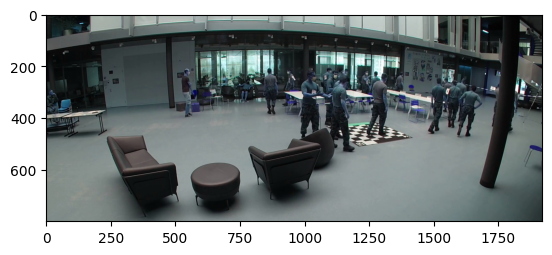

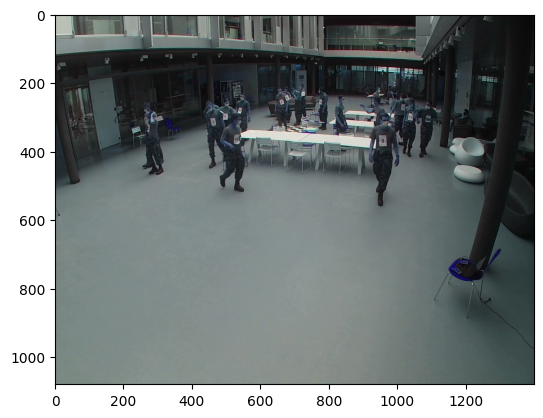

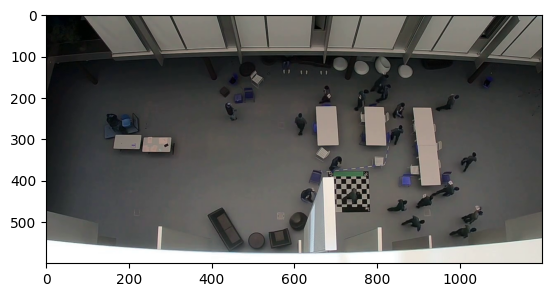

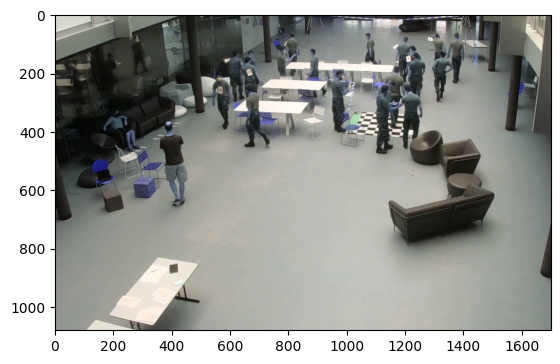

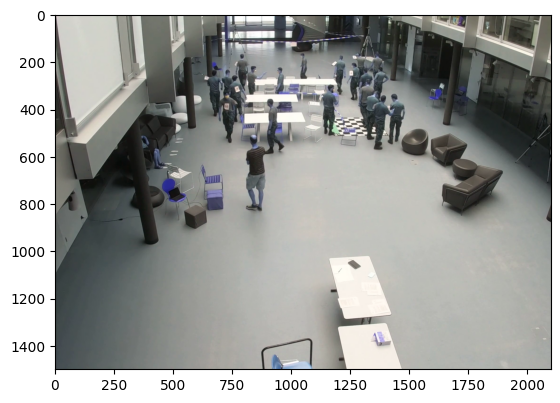

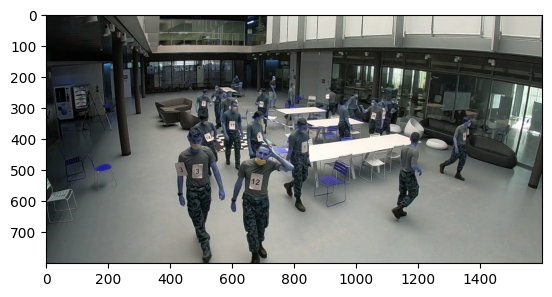

In [198]:
# Parses the json file
def json_read(filename):
    try:
        with open(os.path.abspath(filename)) as f:
            data = json.load(f)
        return data
    except:
        raise ValueError("Unable to read JSON {}".format(filename))

# Function to get a specific frame from the video
def get_frame(view, frame_number):
    vidcap = cv2.VideoCapture("{}.mp4".format(view))
    vidcap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)  # Set the frame position
    success, img = vidcap.read()
    if not success:
        raise ValueError("Unable to read frame {}".format(frame_number))
    return img

# Read json file containing the calibration data
calibration = json_read("calibration.json")

# Specify the frame you want to capture
# frame_number = 1120  # For example, this would read the 10th frame (index starts at 0)
frame_number = 300  # For example, this would read the 10th frame (index starts at 0)

# Get the first frame from each video
view_1 = '3_2'
img1 = get_frame(view_1, frame_number)

view_2 = '3_4'
img2 = get_frame(view_2, frame_number)

view_3 = '6_1'
img3 = get_frame(view_3, frame_number)

view_4 = '6_3'
img4 = get_frame(view_4, frame_number)
view_4 = '6_3'

view_5 = '6_4'
img5 = get_frame(view_5, frame_number)
view_5 = '6_3'

view_6 = '6_5'
img6 = get_frame(view_6, frame_number)
view_6 = '6_3'

# Get the first frame from each video
views = ['3_2', '3_4', '6_1', '6_3', '6_4', '6_5']
imgs = [img1, img2, img3, img4, img5, img6]

# Get the calibration matrices for each view
extrinsics = []
intrinsics = []
for i, view in enumerate(views):
    Lambda = np.array(calibration[view]['K'])      # Intrinsic params.
    Omega  = np.array(calibration[view]['R'])      # Rotation
    tau    = np.array(calibration[view]['t'])      # Translation
    tau = tau.reshape(-1, 1)  # Reshape into a column vector
    dist   = np.array(calibration[view]['dist'])   # Lens distortion

    extrinsic = np.vstack((np.hstack((Omega, tau)), [0, 0, 0, 1]))  # Save the extrinsic matrix for view_1
    intrinsic = np.hstack((Lambda, np.zeros((3, 1))))

    extrinsics.append(extrinsic)
    intrinsics.append(intrinsic)

    tau = tau.reshape(-1, 1)  # Reshape into a column vector

# Display the frames
plt.figure()
plt.imshow(img1)
plt.figure()
plt.imshow(img2)
plt.figure()
plt.imshow(img3)
plt.figure()
plt.imshow(img4)
plt.figure()
plt.imshow(img5)
plt.figure()
plt.imshow(img6)

(4, 4)
(3, 4)
[230.71420365 189.97606726 231.35392387 190.8292603  275.32755033
 239.19227127 275.84035905 239.89143252] [439.28603673 420.94480294 487.41042574 474.79739589 436.24201568
 417.18914534 485.18187237 472.0649311 ]


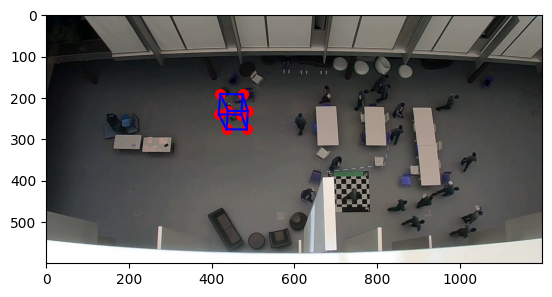

In [194]:
# tau = tau.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega, tau)) , [0, 0, 0, 1]))
# intrinsic = np.hstack((Lambda, np.zeros((3, 1))))

i = 2

extrinsic = extrinsics[i]
intrinsic = intrinsics[i]

print(extrinsic.shape)
print(intrinsic.shape)
# Each column represents a vertex of the cube
points = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 2, 0, 2, 0, 2, 0, 2]])

# Adding homogeneous coordinate for transformations (adding a row of 1's)
points = np.vstack((points, np.ones((1, points.shape[1]))))

# Apply the translation to the points directly (e.g., shift the cube by [dx, dy, dz])
# translation_vector = np.array([[0.25], [5], [0]])  # Translation by (1, 2, 3) in x, y, z directions
translation_vector = np.array([[-3], [-6.25], [0]])  # Translation by (1, 2, 3) in x, y, z directions
points[:3, :] += translation_vector  # Apply translation to the x, y, z rows of points


[x, y, c] = intrinsic @ extrinsic @ points

i = (y / c)
j = (x / c)

print(i,j)

# Connect the points to make edges of the cube
edges = [
    (0, 1), (0, 2), (1, 3), (2, 3),  # Bottom face
    (4, 5), (4, 6), (5, 7), (6, 7),  # Top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges connecting top and bottom faces
]

plt.figure()
plt.imshow(img3)
plt.scatter(j, i, color='red', s=50)  # 's' is the size of the point
# Draw the edges by connecting the corresponding points
for edge in edges:
    plt.plot([j[edge[0]], j[edge[1]]], [i[edge[0]], i[edge[1]]], color='blue')



(1080, 1400, 3)
(1080, 1400, 3)


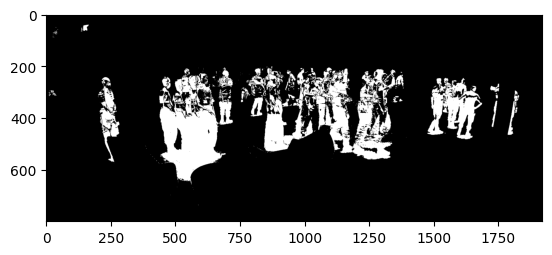

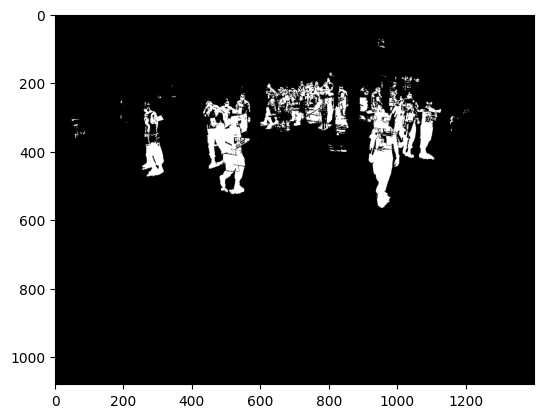

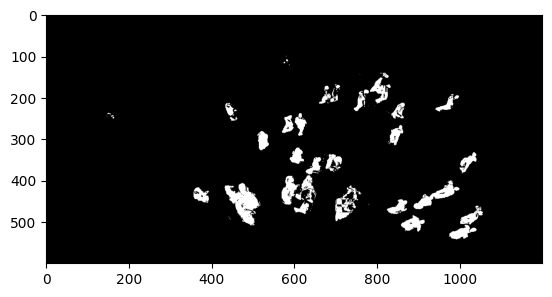

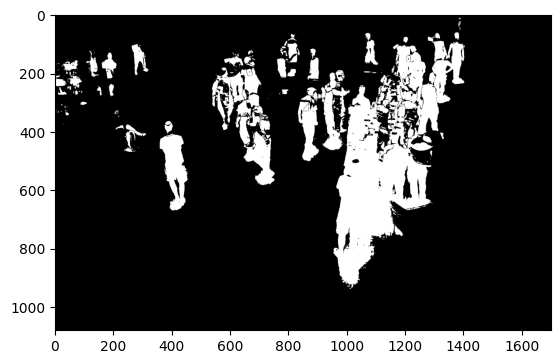

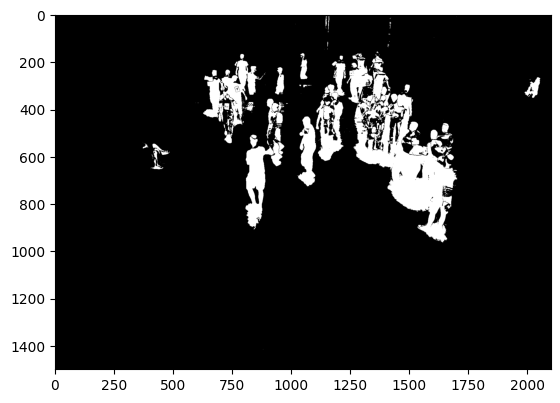

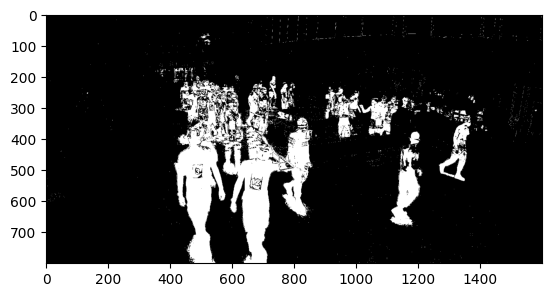

In [209]:
# Function to create a black-and-white mask by subtracting the original image from the current image
def create_mask(img_original, img_current, threshold_value=25):
    # Convert both images to grayscale
    img_original_gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
    img_current_gray = cv2.cvtColor(img_current, cv2.COLOR_BGR2GRAY)

    # Subtract the original image from the current image
    diff = cv2.absdiff(img_current_gray, img_original_gray)

    # Apply a binary threshold to create a black-and-white mask
    _, mask = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

    return mask

print(img2.shape)
print(img2_original.shape)

# Create black-and-white masks for img1, img2, and img3
mask1 = create_mask(img1_original, img1)
mask2 = create_mask(img2_original, img2)
mask3 = create_mask(img3_original, img3)
mask4 = create_mask(img4_original, img4)
mask5 = create_mask(img5_original, img5)
mask6 = create_mask(img6_original, img6)

# Display the masks
plt.figure()
plt.imshow(mask1, cmap='gray')
plt.figure()
plt.imshow(mask2, cmap='gray')
plt.figure()
plt.imshow(mask3, cmap='gray')
plt.figure()
plt.imshow(mask4, cmap='gray')
plt.figure()
plt.imshow(mask5, cmap='gray')
plt.figure()
plt.imshow(mask6, cmap='gray')

masks = [mask1, mask2, mask3, mask4, mask5, mask6]


(4, 4)
(3, 4)
[283.18724574 165.75305045 291.974724   168.16438395 281.03709231
 166.15750379 289.50831231 168.53412157] [1026.46431319 1040.09491649 1022.32170378 1036.52798036  970.20076199
  980.786851    963.11065178  973.934111  ]


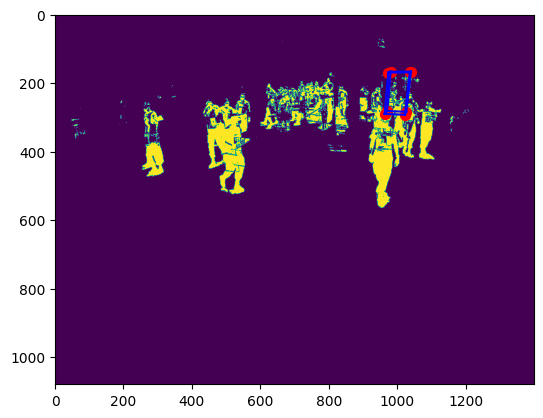

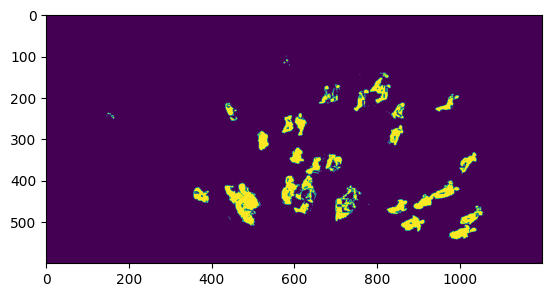

In [217]:
# tau = tau.reshape(-1, 1)  # Reshape into a column vector
# extrinsic = np.vstack(( np.hstack((Omega, tau)) , [0, 0, 0, 1]))
# intrinsic = np.hstack((Lambda, np.zeros((3, 1))))

i = 1
extrinsic = extrinsics[i]
intrinsic = intrinsics[i]

print(extrinsic.shape)
print(intrinsic.shape)
# Each column represents a vertex of the cube
points = np.array([[0, 0, 0, 0, 1, 1, 1, 1],
                   [0, 0, 1, 1, 0, 0, 1, 1],
                   [0, 2, 0, 2, 0, 2, 0, 2]])

# Adding homogeneous coordinate for transformations (adding a row of 1's)
points = np.vstack((points, np.ones((1, points.shape[1]))))

# Apply the translation to the points directly (e.g., shift the cube by [dx, dy, dz])
# translation_vector = np.array([[-3], [-6.5], [0]])  # Translation by (1, 2, 3) in x, y, z directions
points[:3, :] += translation_vector  # Apply translation to the x, y, z rows of points


[x, y, c] = intrinsic @ extrinsic @ points

i = (y / c)
j = (x / c)

print(i,j)

# Connect the points to make edges of the cube
edges = [
    (0, 1), (0, 2), (1, 3), (2, 3),  # Bottom face
    (4, 5), (4, 6), (5, 7), (6, 7),  # Top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # Vertical edges connecting top and bottom faces
]

plt.figure()
plt.imshow(mask2)
plt.scatter(j, i, color='red', s=50)  # 's' is the size of the point
# Draw the edges by connecting the corresponding points
for edge in edges:
    plt.plot([j[edge[0]], j[edge[1]]], [i[edge[0]], i[edge[1]]], color='blue')

plt.figure()
plt.imshow(mask3)

In [216]:
import numpy as np
import plotly.graph_objects as go

# translation_vector = np.array([[-3], [-6.5], [0]])  # Translation by (1, 2, 3) in x, y, z directions

# Define the dimensions of the voxel grid
nrows, ncols, depth = 50, 50, 50  # Define the resolution of the voxel grid
voxel_size = 0.1  # Define the size of each voxel
x_range = np.linspace(0, 1, nrows) + translation_vector[0]  # X coordinates from -2 to 2
y_range = np.linspace(0, 1, ncols) + translation_vector[1]  # Y coordinates from -2 to 2
z_range = np.linspace(0, 2, depth) + translation_vector[2]   # Z coordinates from -2 to 2

# Create voxel volume and set all values to zero (empty or non-object points)
V = np.zeros((nrows, ncols, depth))

# Loop over all voxels in the volume V
for i in range(nrows):
    for j in range(ncols):
        for k in range(depth):
            # Define the voxel's world coordinates
            X = np.array([[x_range[i]], [y_range[j]], [z_range[k]], [1]])  # Homogeneous coordinates

            hit = 0

            # Loop over all cameras
            for cam_idx, (extrinsic, intrinsic, mask) in enumerate(zip(extrinsics, intrinsics, masks)):

                if cam_idx == 0:
                  continue
                elif cam_idx == 1:
                  continue
                # elif cam_idx == 2:
                #   continue
                elif cam_idx == 5:
                  continue
                # Ensure intrinsic is 3x3 and augment it to 3x4
                if intrinsic.shape == (3, 3):
                    intrinsic_augmented = np.hstack((intrinsic, np.array([[0], [0], [1]])))  # Create a 3x4 matrix
                else:
                    intrinsic_augmented = intrinsic  # Keep it as is if it's already 3x4

                # Project the voxel onto the camera
                P = intrinsic_augmented @ extrinsic  # Projection matrix
                x = P @ X  # Project voxel

                # Normalize homogeneous coordinates
                x /= x[2]  # Normalize to get (u, v)

                # Get pixel coordinates (u, v) and convert to integers safely
                u = int(np.round(x[0, 0])) - 1  # Column in image
                v = int(np.round(x[1, 0])) - 1  # Row in image

                if 0 <= u < mask.shape[1] and 0 <= v < mask.shape[0]:
                    if mask[v, u] > 0:
                        hit += 1

            if hit >= len(masks)-3:
                V[i, j, k] = 1
                # print(f"Point found: {x_range[i]}, {y_range[j]}, {z_range[k]}")

# Create a 3D scatter plot using plotly
x, y, z = np.where(V == 1)  # Get the coordinates of the filled voxels

fig = go.Figure(data=[go.Scatter3d(
    # x=x * voxel_size - 1,
    # y=y * voxel_size - 1,
    # z=z * voxel_size - 1,
    x=x_range[x],
    y=y_range[y],
    z=z_range[z],
    mode='markers',
    marker=dict(
        size=3,  # Adjust marker size
        color='red',  # Marker color
        opacity=0.8
    )
)])

# Set layout options
fig.update_layout(
    title='3D Reconstruction of Objects',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis',
    ),
)

# Show the interactive figure
fig.show()
